In [1]:
# JM, 18 Apr 2020
#
# plot the vertical component of the vorticity
#
%matplotlib inline

from pyCDFTOOLS.generic_plotting import *

import cmocean
import datetime

from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib import cm
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colorbar import make_axes
import matplotlib.ticker as mticker

from netCDF4 import Dataset

from pyCDFTOOLS.cdfcurl import *
from pyCDFTOOLS.draw_clock import *

In [2]:
# define some defaults\n",
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["image.cmap"] = "RdBu_r" # \\\"*_r\\\" is reverse of standard colour\\n\",\n",
plt.rcParams["axes.formatter.limits"] = [-4, 4]
plt.rcParams["font.size"] = 12.0

In [3]:
# load data and do relevant processing on the native grid

data_dir = "/home/jclmak/data/NEMO_data/GYRE09/with_BGC/"
fileU = "GYRE_5d_00200101_00201230_snap_U.nc"
fileV = fileU.replace("U.nc", "V.nc")

working in kt 0 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 1 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 2 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 3 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 4 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 5 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 6 / 72...
no depth variable detected in u_file, lo

working in kt 53 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 54 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 55 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 56 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 57 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 58 / 72...
no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option
working in kt 59 / 72...
no depth variable detected in u_f

AttributeError: 'Figure' object has no attribute 'close'

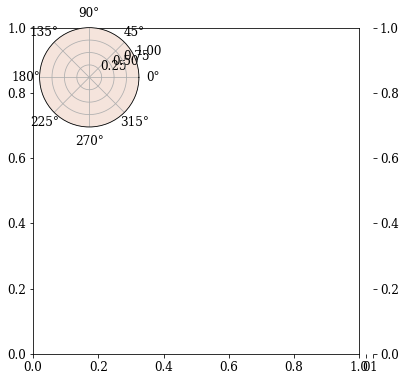

In [4]:
# plot the vorticity time snapshots

# load the time vector

data = Dataset(data_dir + fileU)
time_vec = data.variables["time_centered"][:]
data.close()

yyyymmdd = convert_nemo_times(time_vec, uniform_months = True)

# for vorticity sesmic is good, RdBu_r is ok too
# with cmocean, curl and balance are probably ok
vmin, vmax = -2e-5, 2e-5
plot_opts = {"levels" : np.linspace(vmin, vmax, 41),
             "cmap"   : cmocean.cm.curl,
             "extend" : "both"}

fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
ax_clock = plt.axes([0.2, 0.65, .23, .23], polar = True)

# for putting extra options in
#   -- kt       = number for using a specified time entry (python indexing)
#   -- kz       = number for using a specified vertical level/layer (python indexing)
#   -- lprint   = True   for printing out variable names in netcdf file
#   -- lperio   = True   for E-W periodicity
#   -- loverf   = True   for curl / f
for kt in range(len(time_vec)):
    
    print("working in kt %i / %i..." % (kt, len(time_vec)))
    
    kwargs = {"kz"     : 0,
              "kt"     : kt,
              "lprint" : False,
              "lperio" : True,
              "loverf" : False}

    lonT, latT, curlu, opt_dic = cdfcurl(data_dir, fileU, "ssu", fileV, "ssv", **kwargs)

    ax_labels = {"title" : r"$\xi(z = 0)$", 
                 "xlabel" : "Lon $({}^\circ)$", "ylabel" : "Lat $({}^\circ)$"}
    ax, cs = plot_2d_contourf(lonT, latT, curlu, ax = ax, ax_labels = ax_labels, **plot_opts)

    norm = Normalize(vmin = vmin, vmax = vmax)
    colors = plot_opts["cmap"](np.linspace(0, 1, plot_opts["cmap"].N))
    cmap2 = LinearSegmentedColormap.from_list('dummy', colors)
    cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
    cb.ax.set_ylabel(r"$\mathrm{s}^{-1}$")
    
    draw_clock(yyyymmdd[kt], ax = ax_clock, fontsize = 10, 
               clock_color = cmocean.cm.curl(135), progress_color = cmocean.cm.curl_r)
    
    filename = data_dir + f"video/GYRE09_xi_{kt:04d}.png"
    fig.savefig(filename, dpi = 75, bbox_inches = "tight")
    ax.clear()
    ax_cb.clear()
    ax_clock.clear()

fig.close()

no depth variable detected in u_file, loading only with kt option
no depth variable detected in v_file, loading only with kt option


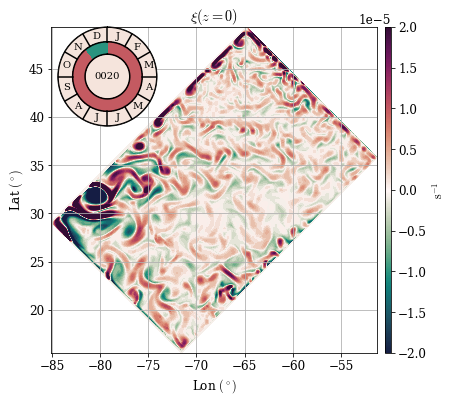

In [6]:
data = Dataset(data_dir + fileU)
time_vec = data.variables["time_centered"][:]
data.close()

yyyymmdd = convert_nemo_times(time_vec, uniform_months = True)

# for vorticity sesmic is good, RdBu_r is ok too
# with cmocean, curl and balance are probably ok
vmin, vmax = -2e-5, 2e-5
plot_opts = {"levels" : np.linspace(vmin, vmax, 41),
             "cmap"   : cmocean.cm.curl,
             "extend" : "both"}

fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
ax_clock = plt.axes([0.2, 0.65, .23, .23], polar = True)

kt = -8

kwargs = {"kz"     : 0,
          "kt"     : kt,
          "lprint" : False,
          "lperio" : True,
          "loverf" : False}

lonT, latT, curlu, opt_dic = cdfcurl(data_dir, fileU, "ssu", fileV, "ssv", **kwargs)

ax_labels = {"title" : r"$\xi(z = 0)$", 
             "xlabel" : "Lon $({}^\circ)$", "ylabel" : "Lat $({}^\circ)$"}
ax, cs = plot_2d_contourf(lonT, latT, curlu, ax = ax, ax_labels = ax_labels, **plot_opts)
ax.set_aspect('equal')

norm = Normalize(vmin = vmin, vmax = vmax)
colors = plot_opts["cmap"](np.linspace(0, 1, plot_opts["cmap"].N))
cmap2 = LinearSegmentedColormap.from_list('dummy', colors)
cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
cb.ax.set_ylabel(r"$\mathrm{s}^{-1}$")

draw_clock(yyyymmdd[kt], ax = ax_clock, fontsize = 10, 
           clock_color = cmocean.cm.curl(135), progress_color = cmocean.cm.curl_r)